In [11]:
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
def lam(x, Gamma):
    return(x * np.sqrt((x * Gamma + 1)/(x-1)))


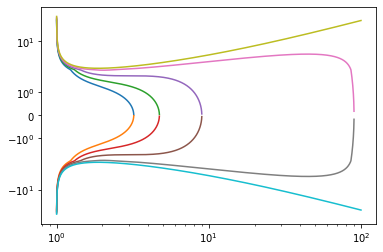

In [33]:
x = np.logspace(-1, 2, num=10000)

Gammas = - 1/9 + np.linspace(-.2, .2, num=5)

for G in Gammas:
    lambda_of_x = lam(x, Gamma=G)
    plt.plot(x, lambda_of_x)
    plt.plot(x, -lambda_of_x)
plt.yscale('symlog', linthreshy=2)
plt.xscale('log')